importing our library from drive

In [1]:
from google.colab import drive
import sys
import os

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Add your project folder to the Python path
# Change 'NeuralProject' to whatever you named your folder in Drive
project_path = '/content/drive/MyDrive/neuralproject'
sys.path.append(project_path)

# 3. Verify it works
try:
    from lib.network import Network
    print("SUCCESS: Library imported correctly!")
except ImportError as e:
    print("ERROR: Could not import. Check your folder path in Drive.")
    print(e)

Mounted at /content/drive
SUCCESS: Library imported correctly!


# **Section 1: Gradiant Checking**

In [2]:
import sys
import os

# Add the parent directory (project root) to sys.path
sys.path.append(os.path.abspath('..'))

import numpy as np
from lib import Network
from lib.layers import Dense
from lib.activations import Tanh
from lib.losses import Loss_MSE

In [3]:
def check_gradients():
    print("--- Starting Gradient Checking ---")

    # 1. Setup a small dummy network
    input_size = 2
    output_size = 1

    # Simple network: Input -> Dense -> Tanh -> Output
    layer = Dense(input_size, output_size)
    activation = Tanh()
    loss_fn = Loss_MSE()

    # Dummy data
    x = np.array([[0.5, -0.2]]) # One sample
    y = np.array([[0.1]])       # One target

    # 2. Forward & Backward Pass (Analytical Gradient)
    # Forward
    z = layer.forward(x)
    a = activation.forward(z)
    loss = loss_fn.forward(y, a)

    # Backward
    grad_loss = loss_fn.backward(y, a)
    grad_activation = activation.backward(grad_loss)
    grad_layer = layer.backward(grad_activation)

    # The gradient we want to check is dL/dW inside the Dense layer
    analytical_gradient = layer.weights_gradient

    # 3. Numerical Gradient Calculation
    # Formula: (Loss(W+epsilon) - Loss(W-epsilon)) / (2*epsilon)
    epsilon = 1e-4
    numerical_gradient = np.zeros_like(layer.weights)

    # Iterate over every single weight
    rows, cols = layer.weights.shape
    for i in range(rows):
        for j in range(cols):
            # Save original weight
            original_weight = layer.weights[i, j]

            # Plus Epsilon
            layer.weights[i, j] = original_weight + epsilon
            z_plus = layer.forward(x)
            a_plus = activation.forward(z_plus)
            loss_plus = loss_fn.forward(y, a_plus)

            # Minus Epsilon
            layer.weights[i, j] = original_weight - epsilon
            z_minus = layer.forward(x)
            a_minus = activation.forward(z_minus)
            loss_minus = loss_fn.forward(y, a_minus)

            # Calculate numerical derivative
            numerical_gradient[i, j] = (loss_plus - loss_minus) / (2 * epsilon)

            # Restore original weight
            layer.weights[i, j] = original_weight

    # 4. Compare
    print("Analytical Gradient:\n", analytical_gradient)
    print("Numerical Gradient:\n", numerical_gradient)

    # Calculate relative error
    numerator = np.linalg.norm(analytical_gradient - numerical_gradient)
    denominator = np.linalg.norm(analytical_gradient) + np.linalg.norm(numerical_gradient)
    relative_error = numerator / denominator

    print(f"\nRelative Error: {relative_error}")

    if relative_error < 1e-5:
        print("[SUCCESS] Gradients match! Backpropagation is correct.")
    else:
        print("[WARNING] Gradients do not match. Check backward formulas.")

# Run the check
check_gradients()

--- Starting Gradient Checking ---
Analytical Gradient:
 [[ 0.13093265]
 [-0.05237306]]
Numerical Gradient:
 [[ 0.13093265]
 [-0.05237306]]

Relative Error: 2.2077153002442847e-09
[SUCCESS] Gradients match! Backpropagation is correct.


# **Section 2: XOR Problem**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
from lib.network import Network
from lib.layers import Dense
from lib.activations import Tanh, Sigmoid
from lib.losses import Loss_MSE
from lib.optimizer import SGD

## Dataset

In [5]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

## Building the model

In [6]:
# Initialize Network
model = Network()

# Build the 2-4-1 Architecture
# Layer 1: Dense (Input 2 -> Hidden 4)
model.add(Dense(2, 4))
# Activation 1: Tanh
model.add(Tanh())

# Layer 2: Dense (Hidden 4 -> Output 1)
model.add(Dense(4, 1))
# Activation 2: Sigmoid (Output between 0 and 1)
model.add(Sigmoid())

## Training

In [11]:
# Define Loss and Optimizer
loss_function = Loss_MSE()
optimizer = SGD(learning_rate=0.01)

# Compile the model
model.use(loss_function, optimizer)

# Train the network
# 10,000 epochs is usually enough for XOR to converge
print("Starting Training...")

start_time = time.time()
history_xor = model.train(X, y, epochs=10000)
end_time = time.time()

train_time = end_time - start_time
print("Training Complete.")
print(f"Training Time: {train_time:.2f} seconds")

Streaming output truncated to the last 5000 lines.
Epoch 5003/10000 error=0.002302
Epoch 5004/10000 error=0.002301
Epoch 5005/10000 error=0.002301
Epoch 5006/10000 error=0.002300
Epoch 5007/10000 error=0.002300
Epoch 5008/10000 error=0.002300
Epoch 5009/10000 error=0.002299
Epoch 5010/10000 error=0.002299
Epoch 5011/10000 error=0.002298
Epoch 5012/10000 error=0.002298
Epoch 5013/10000 error=0.002298
Epoch 5014/10000 error=0.002297
Epoch 5015/10000 error=0.002297
Epoch 5016/10000 error=0.002297
Epoch 5017/10000 error=0.002296
Epoch 5018/10000 error=0.002296
Epoch 5019/10000 error=0.002295
Epoch 5020/10000 error=0.002295
Epoch 5021/10000 error=0.002295
Epoch 5022/10000 error=0.002294
Epoch 5023/10000 error=0.002294
Epoch 5024/10000 error=0.002293
Epoch 5025/10000 error=0.002293
Epoch 5026/10000 error=0.002293
Epoch 5027/10000 error=0.002292
Epoch 5028/10000 error=0.002292
Epoch 5029/10000 error=0.002292
Epoch 5030/10000 error=0.002291
Epoch 5031/10000 error=0.002291
Epoch 5032/10000 erro

## Plotting

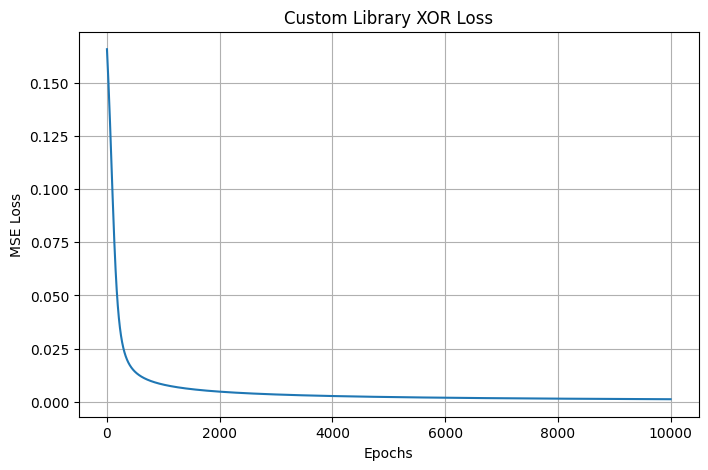

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(history_xor)
plt.title('Custom Library XOR Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.show()

## Demonstaritioon

In [13]:
print("\n--- Final XOR Predictions ---")
X = np.array([(-1.0, 0.8), (0.3, -0.4), (-1.0, -0.9), (0.5, 0.5)])
output = model.predict(X)

for i in range(len(X)):
    input_val = X[i]
    true_val = y[i]
    pred_val = output[i]

    # Round prediction to 0 or 1 for clarity
    class_pred = 1 if pred_val > 0.5 else 0

    print(f"Input: {input_val} | True: {true_val} | Pred: {pred_val[0]:.4f} | Class: {class_pred}")

# Verification
if (output[0]<0.1 and output[1]>0.9 and output[2]>0.9 and output[3]<0.1):
    print("\n[SUCCESS] The network solved XOR!")
else:
    print("\n[FAILURE] The network did not converge. Try adjusting the learning rate or weights.")


--- Final XOR Predictions ---
Input: [-1.   0.8] | True: [0] | Pred: 0.0416 | Class: 0
Input: [ 0.3 -0.4] | True: [1] | Pred: 0.9659 | Class: 1
Input: [-1.  -0.9] | True: [1] | Pred: 0.9811 | Class: 1
Input: [0.5 0.5] | True: [0] | Pred: 0.0429 | Class: 0

[SUCCESS] The network solved XOR!


# **Section 3: Autoencoder Implemntation**

## Load MNIST data

In [14]:
import tensorflow as tf
#tensorflow is used here now just for loading the data of mnist it will not be used in the model
#the data type loaded here is image 28x28 still need preprocessing
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Visualizing some data (just to see it not more)

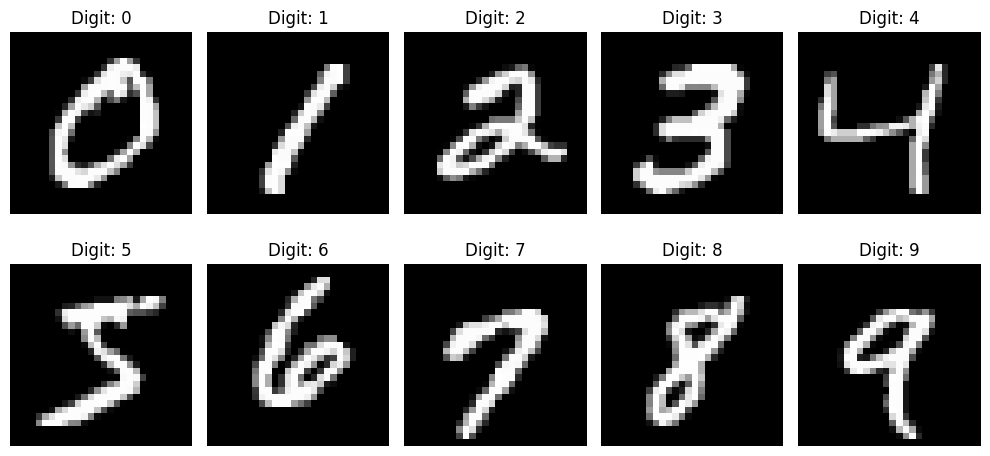

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))

for digit in range(10):
    idx = np.where(y_train == digit)[0][0]
    plt.subplot(2, 5, digit + 1)
    plt.imshow(x_train[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Digit: {digit}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Preprocessing the data

In [15]:
#normalizing the data
#ne5leha mn 0 to 1
x_train = x_train.astype("float32")/250.0
x_test = x_test.astype("float32")/250.0

#flatten the data
#turn it from 2d 28x28 to 1d vector 1x784 weda howa i/p 1st layer from encoder
#encoder layers hatkon dense layer mehtaga i/p 1d
x_train = x_train.reshape(-1, 784)
x_test  = x_test.reshape(-1, 784)

## Autoencoder Implementation

with relu in the final layer

In [ ]:
from lib import Network
from lib.layers import Dense
from lib.activations import ReLU,Sigmoid
from lib.losses import Loss_MSE
from lib.optimizer import SGD

def implement_autoencoder():
    #autoencoder archeticture:
    #encoder: 784 -> 256 -> 64 (latent space)
    #decoder: 64 -> 256 -> 784
    auto = Network()

    #encoder
    auto.add(Dense(784,256))
    auto.add(ReLU())

    auto.add(Dense(256,64))
    auto.add(ReLU())

    #decoder
    auto.add(Dense(64,256))
    auto.add(ReLU())

    auto.add(Dense(256,784))
    auto.add(ReLU())

    return auto

In [37]:
import time
autoencoder = implement_autoencoder()
loss = Loss_MSE()
opt = SGD(learning_rate=0.01)

autoencoder.use(loss,opt)

start_time = time.time()

history = autoencoder.train(x_train , x_train , epochs = 30 , batch_size = 64)

end_time = time.time()

train_time = end_time - start_time

print(f"Training Time: {train_time:.2f} seconds")

Epoch 1/30 error=0.038416
Epoch 2/30 error=0.019432
Epoch 3/30 error=0.015161
Epoch 4/30 error=0.013120
Epoch 5/30 error=0.011866
Epoch 6/30 error=0.011022
Epoch 7/30 error=0.010398
Epoch 8/30 error=0.009910
Epoch 9/30 error=0.009526
Epoch 10/30 error=0.009227
Epoch 11/30 error=0.008980
Epoch 12/30 error=0.008785
Epoch 13/30 error=0.008603
Epoch 14/30 error=0.008470
Epoch 15/30 error=0.008313
Epoch 16/30 error=0.008160
Epoch 17/30 error=0.008028
Epoch 18/30 error=0.007923
Epoch 19/30 error=0.007813
Epoch 20/30 error=0.007695
Epoch 21/30 error=0.007600
Epoch 22/30 error=0.007494
Epoch 23/30 error=0.007399
Epoch 24/30 error=0.007340
Epoch 25/30 error=0.007240
Epoch 26/30 error=0.007161
Epoch 27/30 error=0.007081
Epoch 28/30 error=0.007007
Epoch 29/30 error=0.006905
Epoch 30/30 error=0.006863
Training Time: 513.74 seconds


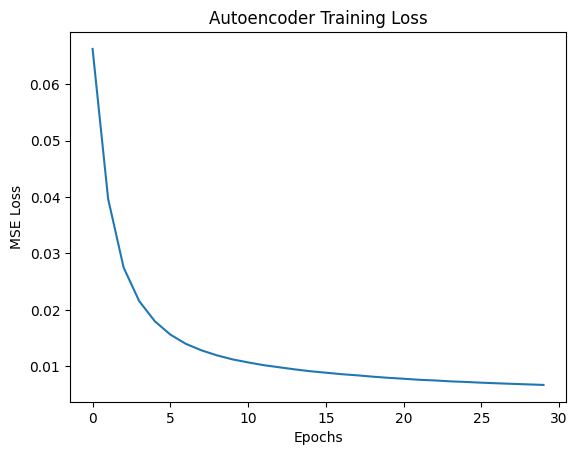

In [ ]:
# Plot the training error over epochs
plt.plot(history)
plt.title('Autoencoder Training Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.show()

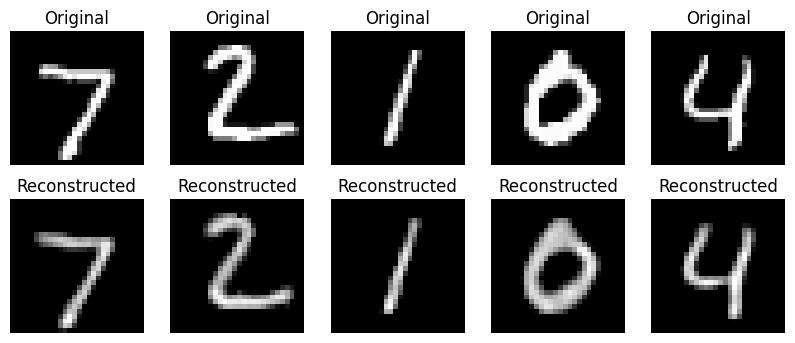

In [ ]:
# Select a few test images
num_images = 5
test_images = x_test[:num_images]

# Get reconstructions
reconstructions = autoencoder.predict(test_images)

# Plotting
plt.figure(figsize=(10, 4))
for i in range(num_images):
    # Original
    ax = plt.subplot(2, num_images, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(reconstructions[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()

In [ ]:
import numpy as np

def save_model_weights(model, filename="autoencoder_weights.npz"):
    """Saves weights and biases from all Dense layers in the network."""
    parameters = {}

    # Loop through layers and grab weights if they exist
    for i, layer in enumerate(model.layers):
        if hasattr(layer, 'weights'):
            parameters[f"layer_{i}_weights"] = layer.weights
            parameters[f"layer_{i}_bias"] = layer.bias

    # Save to a compressed .npz file
    np.savez(filename, **parameters)
    print(f"Model weights saved to {filename}")

# Save your trained autoencoder
save_model_weights(autoencoder, "my_autoencoder.npz")

Model weights saved to my_autoencoder.npz


In [ ]:
def load_model_weights(model, filename="autoencoder_weights.npz"):
    data = np.load(filename)

    for i, layer in enumerate(model.layers):
        if hasattr(layer, 'weights'):
            # Check if keys exist for this layer
            w_key = f"layer_{i}_weights"
            b_key = f"layer_{i}_bias"

            if w_key in data:
                layer.weights = data[w_key]
                layer.bias = data[b_key]
    print("Weights loaded successfully!")

with sigmoid in the final layer

In [18]:
from lib import Network
from lib.layers import Dense
from lib.activations import ReLU,Sigmoid
from lib.losses import Loss_MSE
from lib.optimizer import SGD

def implement_autoencoder():
    #autoencoder archeticture:
    #encoder: 784 -> 256 -> 64 (latent space)
    #decoder: 64 -> 256 -> 784
    auto = Network()

    #encoder
    auto.add(Dense(784,256))
    auto.add(ReLU())

    auto.add(Dense(256,64))
    auto.add(ReLU())

    #decoder
    auto.add(Dense(64,256))
    auto.add(ReLU())

    auto.add(Dense(256,784))
    auto.add(Sigmoid())

    return auto

In [36]:
import time
autoencoder_sigm = implement_autoencoder()
loss = Loss_MSE()
opt = SGD(learning_rate=0.01)

autoencoder_sigm.use(loss,opt)

start_time = time.time()

history_2 = autoencoder_sigm.train(x_train , x_train , epochs = 30 , batch_size = 64)

end_time = time.time()
train_time = end_time - start_time

print(f"Training Time: {train_time:.2f} seconds")

Epoch 1/30 error=0.037922
Epoch 2/30 error=0.019097
Epoch 3/30 error=0.015027
Epoch 4/30 error=0.013054
Epoch 5/30 error=0.011867
Epoch 6/30 error=0.011067
Epoch 7/30 error=0.010477
Epoch 8/30 error=0.009994
Epoch 9/30 error=0.009627
Epoch 10/30 error=0.009315
Epoch 11/30 error=0.009035
Epoch 12/30 error=0.008821
Epoch 13/30 error=0.008617
Epoch 14/30 error=0.008462
Epoch 15/30 error=0.008330
Epoch 16/30 error=0.008191
Epoch 17/30 error=0.008058
Epoch 18/30 error=0.007915
Epoch 19/30 error=0.007776
Epoch 20/30 error=0.007669
Epoch 21/30 error=0.007573
Epoch 22/30 error=0.007485
Epoch 23/30 error=0.007390
Epoch 24/30 error=0.007246
Epoch 25/30 error=0.007212
Epoch 26/30 error=0.007118
Epoch 27/30 error=0.007048
Epoch 28/30 error=0.006972
Epoch 29/30 error=0.006918
Epoch 30/30 error=0.006841
Training Time: 538.56 seconds


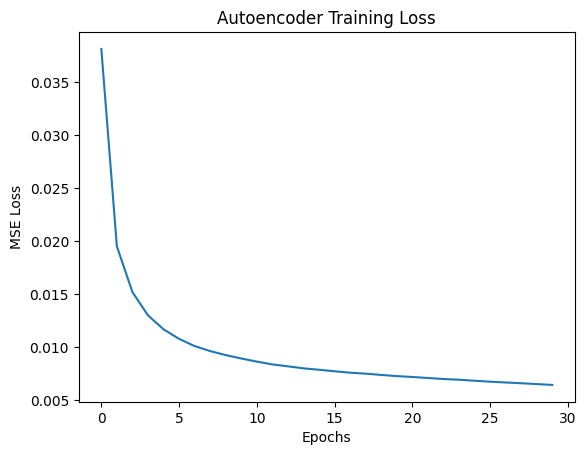

In [20]:
# Plot the training error over epochs
plt.plot(history_2)
plt.title('Autoencoder Training Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.show()

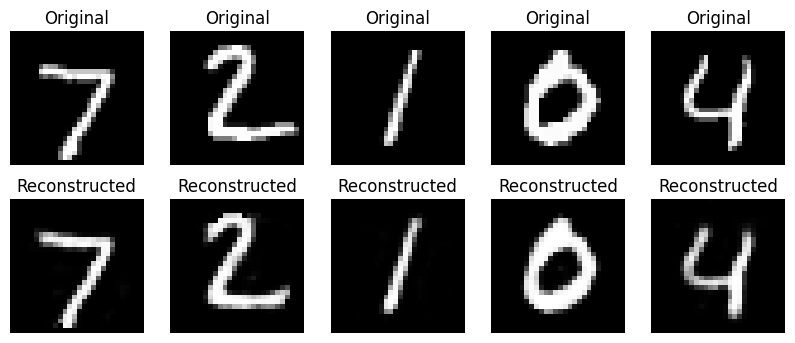

In [21]:
# Select a few test images
num_images = 5
test_images = x_test[:num_images]

# Get reconstructions
reconstructions = autoencoder_sigm.predict(test_images)

# Plotting
plt.figure(figsize=(10, 4))
for i in range(num_images):
    # Original
    ax = plt.subplot(2, num_images, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(reconstructions[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()

# **Section 4: SVM Classification**

## Feature extraction using encoder

Splitting the encoder part

In [ ]:
def split_encoder(autoencoder):
    encoder = Network()
    encoder.layers = autoencoder.layers[:4]  # first 2 Dense + ReLU
    return encoder

In [ ]:
encoder = split_encoder(autoencoder)
latent = encoder.predict(x_train[:1])
print(latent.shape)  # (1, 64)
print(latent)

(1, 64)
[[1.90060508 2.5523302  1.13981271 0.56648191 0.84724781 3.33076395
  2.21763853 2.13352921 0.         0.72353053 1.10923413 0.9273657
  0.33579008 0.56244604 0.48126399 0.67958621 1.65196551 2.71444458
  2.36765453 0.96082721 1.68243629 2.6176023  1.47414355 4.48248401
  1.12652098 2.74193664 0.22106023 0.0069079  1.3059648  1.26364712
  1.11732905 1.01185825 0.46979303 0.79840199 1.32086589 1.55045407
  0.43126511 1.30599367 0.57636357 2.67802838 0.         0.25143738
  1.2117283  2.27940509 0.49808701 0.43478536 0.88529637 1.76262245
  3.28117223 1.22202147 0.89787602 0.55661396 2.90546875 1.79865011
  0.90778072 0.8885138  2.56257006 0.28711381 1.88292229 0.44793828
  2.72548466 1.70095993 2.70886803 0.20114418]]


In [ ]:
X_train_latent = np.array([
    encoder.predict(x.reshape(1, -1)).flatten()
    for x in x_train
])

X_test_latent = np.array([
    encoder.predict(x.reshape(1, -1)).flatten()
    for x in x_test
])


visualizing latent space

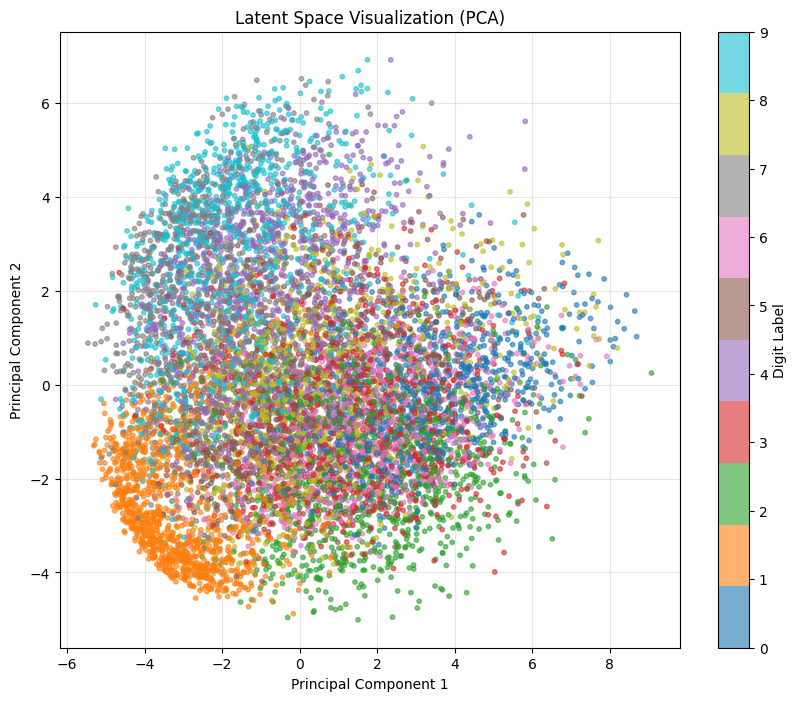

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

# 1. Reduce dimensions from 64 to 2 for plotting
# We use x_test_features (which you already created for the SVM)
pca = PCA(n_components=2)
latent_2d = pca.fit_transform(X_test_latent)

# 2. Plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=y_test, cmap='tab10', alpha=0.6, s=10)
plt.colorbar(scatter, label='Digit Label')
plt.title('Latent Space Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)
plt.show()

##Training SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=10)
svm.fit(X_train_latent, y_train)

SVC(C=10)

##Evaluation

Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test_latent)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Classification Accuracy: {accuracy * 100:.2f}%")

SVM Classification Accuracy: 98.59%


Confusion Matrix

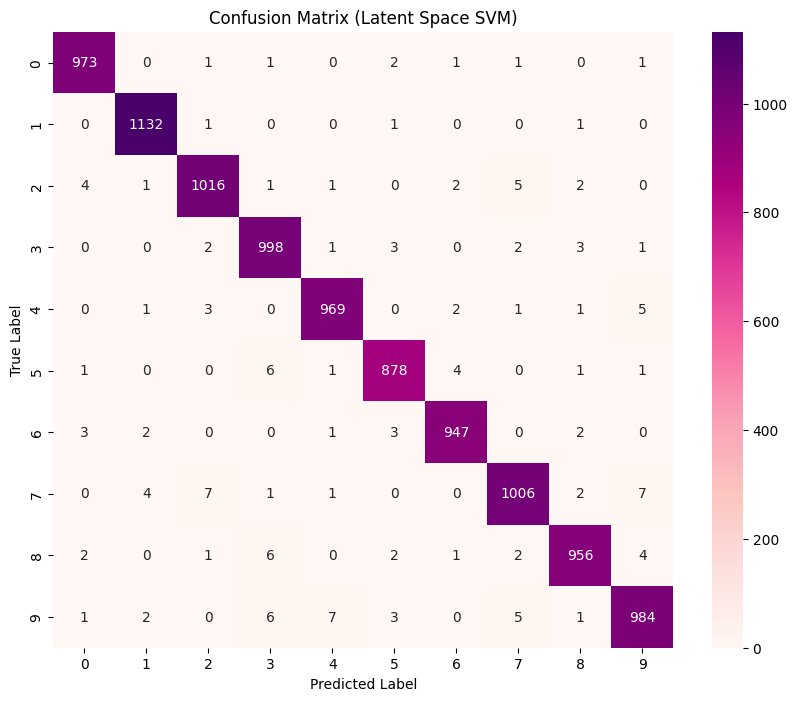

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu')
plt.title('Confusion Matrix (Latent Space SVM)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# **Section 5:Tensorflow/keras comparison**

## XOR

In [22]:
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

xor_model_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(4, input_dim=2, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
xor_model_tf.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
print("--- Training Keras XOR Model ---")
start_time = time.time()
history_xor = xor_model_tf.fit(X, y, epochs=10000, verbose=0)
end_time = time.time()
xor_time = end_time - start_time

print(f"Training Time: {xor_time:.4f} seconds")
print(f"Final Loss: {history_xor.history['loss'][-1]:.6f}")
print("Predictions:\n", xor_model_tf.predict(X))

--- Training Keras XOR Model ---
Training Time: 442.4413 seconds
Final Loss: 0.011759
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predictions:
 [[0.0627728 ]
 [0.8927767 ]
 [0.8835027 ]
 [0.13424839]]


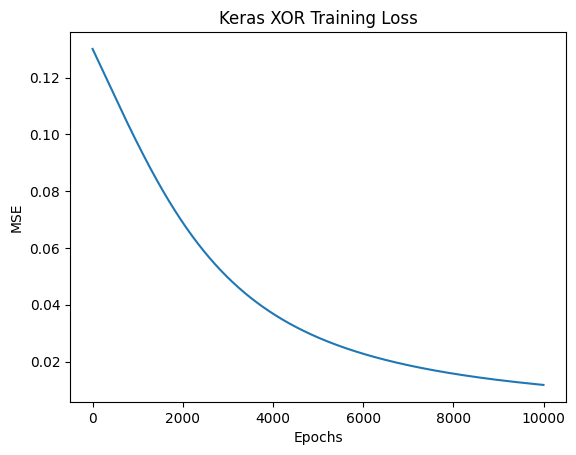

In [25]:
plt.plot(history_xor.history['loss'])
plt.title('Keras XOR Training Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

## Autoencoder

In [26]:
import tensorflow as tf
import time

autoencoder_tf = tf.keras.Sequential([
    # Encoder
    tf.keras.layers.Dense(256, input_shape=(784,), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),

    # Decoder
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(784, activation='relu')
])

# 2. Compile
autoencoder_tf.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(learning_rate=0.1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
print("\n--- Training Keras Autoencoder ---")
start_time = time.time()

# Use same batch_size and epochs as my library
history_ae = autoencoder_tf.fit(
    x_train, x_train,
    epochs=30,
    batch_size=64,
    shuffle=True,
    validation_data=(x_test, x_test),
    verbose=1
)

end_time = time.time()
ae_time = end_time - start_time

print(f"Training Time: {ae_time:.2f} seconds")
print(f"Final Train Loss: {history_ae.history['loss'][-1]:.6f}")
print(f"Final Val Loss: {history_ae.history['val_loss'][-1]:.6f}")


--- Training Keras Autoencoder ---
Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0937 - val_loss: 0.0775
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0765 - val_loss: 0.0745
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.0731 - val_loss: 0.0686
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 0.0667 - val_loss: 0.0618
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 0.0606 - val_loss: 0.0567
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0556 - val_loss: 0.0520
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0514 - val_loss: 0.0491
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - loss: 0.0488 - val_loss: 0.0466
Epoch 9/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - loss: 0.0464 - val_loss: 0.0447
Epoch 10/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - loss: 0.0446 - val_loss: 0.0431
Epoch 11/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 0.0431 - val_loss: 0.0416


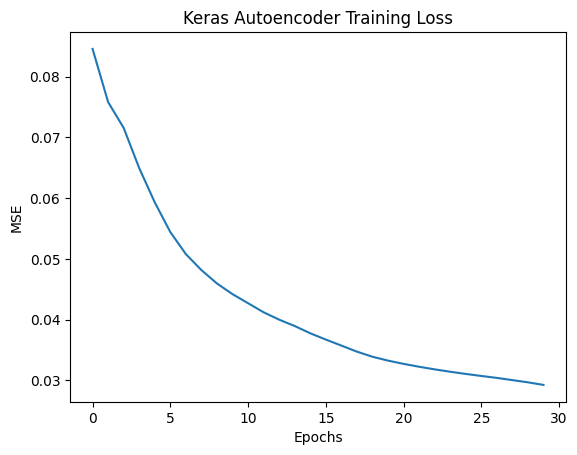

In [28]:
plt.plot(history_ae .history['loss'])
plt.title('Keras Autoencoder Training Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

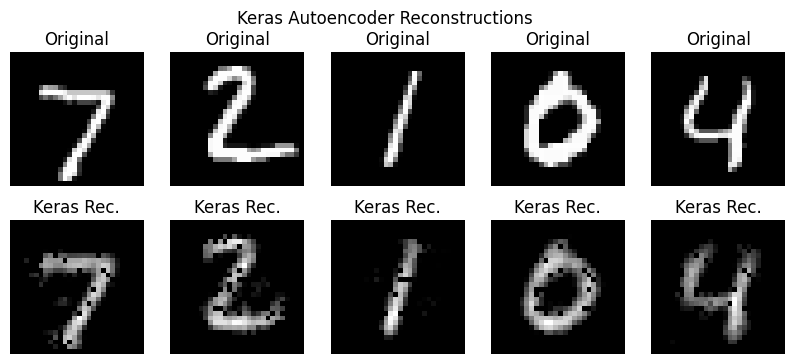

In [35]:
import matplotlib.pyplot as plt

# 1. Select a few test images
num_images = 5
test_images = x_test[:num_images]

# 2. Get reconstructions using the Keras model
# We use 'verbose=0' to hide the progress bar
reconstructions_keras = autoencoder_tf.predict(test_images, verbose=0)

# 3. Plotting
plt.figure(figsize=(10, 4))
for i in range(num_images):
    # Original
    ax = plt.subplot(2, num_images, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed (Keras)
    ax = plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(reconstructions_keras[i].reshape(28, 28), cmap='gray')
    plt.title("Keras Rec.")
    plt.axis('off')

plt.suptitle("Keras Autoencoder Reconstructions")
plt.show()

autoencoder with sigmoid

In [31]:
import tensorflow as tf
import time

autoencoder_tf_2 = tf.keras.Sequential([
    # Encoder
    tf.keras.layers.Dense(256, input_shape=(784,), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),

    # Decoder
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(784, activation='sigmoid')
])

# 2. Compile
autoencoder_tf_2.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(learning_rate=0.1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
print("\n--- Training Keras Autoencoder ---")
start_time = time.time()

# Use same batch_size and epochs as my library
history_ae_2 = autoencoder_tf_2.fit(
    x_train, x_train,
    epochs=30,
    batch_size=64,
    shuffle=True,
    validation_data=(x_test, x_test),
    verbose=1
)

end_time = time.time()
ae_time = end_time - start_time

print(f"Training Time: {ae_time:.2f} seconds")
print(f"Final Train Loss: {history_ae.history['loss'][-1]:.6f}")
print(f"Final Val Loss: {history_ae.history['val_loss'][-1]:.6f}")


--- Training Keras Autoencoder ---
Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - loss: 0.2136 - val_loss: 0.0749
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0736 - val_loss: 0.0722
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0720 - val_loss: 0.0712
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0707 - val_loss: 0.0701
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0696 - val_loss: 0.0687
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0683 - val_loss: 0.0667
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0663 - val_loss: 0.0644
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0641 - val_loss: 0.0622
Epoch 9/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0620 - val_loss: 0.0599
Epoch 10/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0595 - val_loss: 0.0576
Epoch 11/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0573 - val_loss: 0.0553
Epoch 12/30


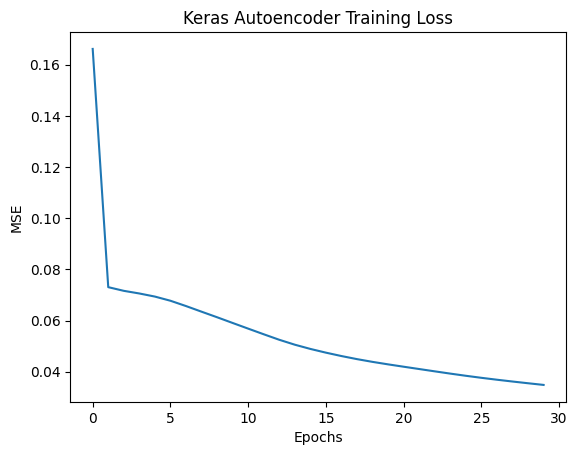

In [33]:
plt.plot(history_ae_2.history['loss'])
plt.title('Keras Autoencoder Training Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

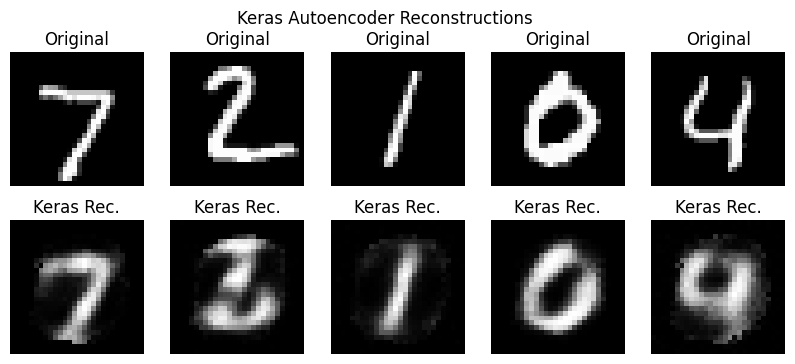

In [34]:
import matplotlib.pyplot as plt

# 1. Select a few test images
num_images = 5
test_images = x_test[:num_images]

# 2. Get reconstructions using the Keras model
# We use 'verbose=0' to hide the progress bar
reconstructions_keras = autoencoder_tf_2.predict(test_images, verbose=0)

# 3. Plotting
plt.figure(figsize=(10, 4))
for i in range(num_images):
    # Original
    ax = plt.subplot(2, num_images, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed (Keras)
    ax = plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(reconstructions_keras[i].reshape(28, 28), cmap='gray')
    plt.title("Keras Rec.")
    plt.axis('off')

plt.suptitle("Keras Autoencoder Reconstructions")
plt.show()